In [4]:
import pandas as pd
import numpy as np

In [31]:
data_ads = pd.read_csv('./datasets/ads/Advertising.csv')
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
len(data_ads)

200

In [5]:
data_ads["correlation"] = (data_ads['TV'] - np.mean(data_ads['TV'])) * (data_ads['Sales'] - np.mean(data_ads['Sales']))

In [9]:
data_ads['correlation1'] = (data_ads['TV'] - np.mean(data_ads['TV']))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,correlation,correlation1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [10]:
data_ads['correlation2'] = (data_ads['Sales'] - np.mean(data_ads['Sales']))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,correlation,correlation1,correlation2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [11]:
c_pearson = sum(data_ads['correlation'])/np.sqrt(sum(data_ads['correlation1']) * sum(data_ads['correlation2']))

In [12]:
c_pearson

0.782224424861606

In [15]:
def coePearson(df, var1, var2):
    df['correlation'] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df['correlation1'] = (df[var1] - np.mean(df[var1]))**2
    df['correlation2'] = (df[var2] - np.mean(df[var2]))**2
    c_pearson = sum(df['correlation'])/np.sqrt(sum(df['correlation1']) * sum(df['correlation2']))
    print(c_pearson)

In [18]:
coePearson(data_ads, 'TV', 'Sales')

0.782224424861606


In [19]:
coePearson(data_ads, 'Radio', 'Sales')


0.576222574571055


In [21]:
cols = data_ads.columns.values

In [24]:
for x in cols:
    for y in cols:
        res = coePearson(data_ads, x, y)
        print(f'{x}, {y}:{res}')

1.0
TV, TV:None
0.05480866446583006
TV, Radio:None
0.056647874965056993
TV, Newspaper:None
0.782224424861606
TV, Sales:None
0.05480866446583006
Radio, TV:None
1.0
Radio, Radio:None
0.35410375076117545
Radio, Newspaper:None
0.576222574571055
Radio, Sales:None
0.056647874965056993
Newspaper, TV:None
0.35410375076117545
Newspaper, Radio:None
1.0
Newspaper, Newspaper:None
0.22829902637616534
Newspaper, Sales:None
0.782224424861606
Sales, TV:None
0.576222574571055
Sales, Radio:None
0.22829902637616534
Sales, Newspaper:None
1.0
Sales, Sales:None


In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'TV vs Ventas')

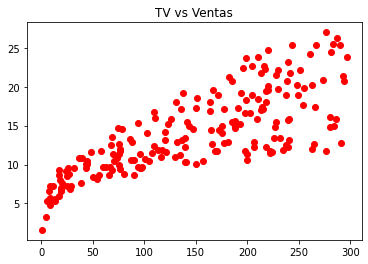

In [27]:
plt.plot(data_ads['TV'], data_ads['Sales'], 'ro')
plt.title('TV vs Ventas')

Text(0.5, 1.0, 'Radio vs Ventas')

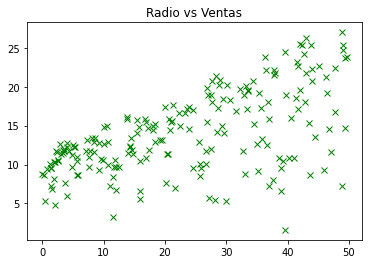

In [30]:
plt.plot(data_ads['Radio'], data_ads['Sales'], 'gx')
plt.title('Radio vs Ventas')

Text(0.5, 1.0, 'Newspaper vs Ventas')

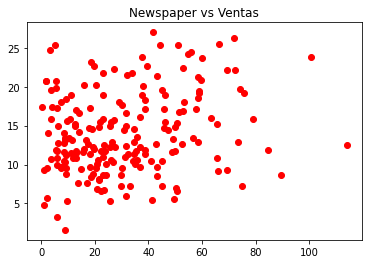

In [29]:
plt.plot(data_ads['Newspaper'], data_ads['Sales'], 'ro')
plt.title('Newspaper vs Ventas')

In [32]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


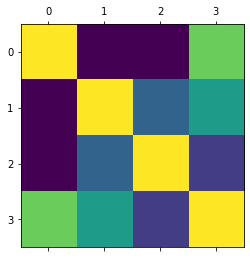

In [33]:
plt.matshow(data_ads.corr())